# A/B Testing and Power Analysis
<i>By Diego Ramallo</i>

<img src="https://dl.dropboxusercontent.com/u/59776078/data_science/data_science/branch-1290017_1280.png" alt="Drawing" style="width: 350px;"/>

A/B testing is an experimental method used to <strong>measure the effect of a variable on a target response</strong>. For example, many tech companies use this method to test the effect of product features on an outcome such as visits, click-through rate, and other metrics that indicate business success. As a data scientist, <strong>the outcome of your A/B tests can help your clients make data-driven business decisions.</strong> Here, we will provide a walkthrough with examples and tips for how to conduct an A/B test and how to analyze the data properly.

### Table of Contents

[1. A/B Test Design |](#A/B Test Design)
[2. Continuous Data: T-Test and Non-parametric Tests |](#Continuous Data: T-Test and Non-parametric Tests)

[3. Categorical Data: Chi-Squared Test |](#Categorical Data: Chi-Squared Test)
[4. Power Analysis |](#Power Analysis)
[5.Final Thoughts](#Final Thoughts)



## A/B Test Design

<a id='A/B Test Design'></a>

Before conducting your A/B test, it's important to understand your system, your data, and potential outcomes. Typically, you'll be testing whether the difference you observe between two conditions is significant enough to make a decision/enact a feature on that action. Here are a few questions you should answer before performing an A/B test:

1. What is the metric that I will be measuring? What variables will I be comparing? 
2. Do I currently have the data to answer this question? Is it continuous or categorical?
3. How will I test my hypothesis?
4. How much data will be necessary to detect a significant result? This is called  <strong>Power Analysis</strong>.  

## Continuous Data: T-Test and Non-parametric Tests

<a id='Continuous Data: T-Test and Non-parametric Tests'></a>

Let's assume we're interested in improving the amount of money people donate to our charity. We have the option of using either a blue or an orange 'donate' button to see if one is better at bringing in donations than the other. This will require an A/B test!

### Normal Data

Since we will have sampled our users from the same population and just given them different button conditions, we'll assume equal variance (same sigma). 

In [6]:
import numpy as np

#Generate normal distribution mean and standard deviations both buttons
blue_mu, blue_sigma= 20,3
orange_mu, orange_sigma= 15,3

#Sample data for each button using above parameters
blue_button_donation= np.random.normal(blue_mu,blue_sigma,1000)
orange_button_donation= np.random.normal(orange_mu,orange_sigma,1000)

print 'Here is a glimpse of some of our data:'
print 'Blue button donations, orange button donations'
zip(blue_button_donation[0:10], orange_button_donation[0:10])

Here is a glimpse of some of our data:
Blue button donations, orange button donations


[(21.473625286273755, 15.902679207707573),
 (20.64617949401433, 15.649060155350575),
 (19.79516860569073, 11.472138379075263),
 (17.350363302366489, 16.821689532860042),
 (21.340372558819929, 14.544832550534785),
 (18.902283417910336, 10.384499271426662),
 (19.476666067763073, 19.526976173510999),
 (15.996241952619947, 16.226421745963886),
 (20.37886899045025, 11.934444179620286),
 (20.725047367972806, 18.262024323498821)]

Histograms


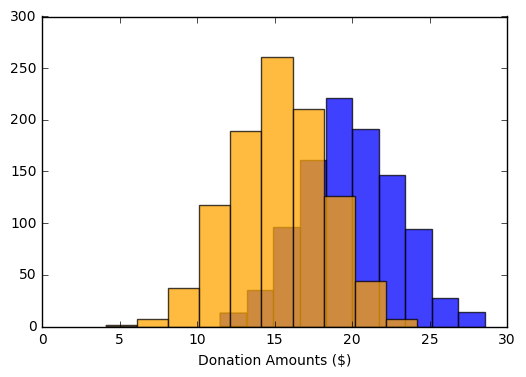

In [7]:
import matplotlib.pyplot as plt

#Plot histogram
%matplotlib inline
plt.hist(blue_button_donation, color= 'blue', alpha= 0.75)
plt.hist(orange_button_donation, color= 'orange', alpha= 0.75)
plt.xlabel('Donation Amounts ($)')
print 'Histograms'

Now that we have our data, we need to test our null hypothesis that the mean value for donations using the blue or orange button are equal. For continuous data we have a few flavors of tests.

### T-Test

For now, since our data is normally distributed we'll perform a very simple two-sample t-test using scipy's stats library. Since it's a typical (but <strong>completely arbitrary</strong>) value, let's assume that our threshold for significance will be at <strong>p= 0.05</strong>. If we fall below it, we'll deem the difference in means to be significant, indicating that we can reject the null hypothesis.

In [181]:
#Import scipy which has stats t-test libraries
from scipy import stats

#Feed blue and orange button data to perform test assuming equal variance
t_test= scipy.stats.ttest_ind(blue_button_donation, orange_button_donation,
                             equal_var= True)

#Print t-score statistic and p-value
print 'T-Test p-value: '
t_test

T-Test p-value: 


Ttest_indResult(statistic=34.151692831164517, pvalue=9.5550668497062891e-202)

Excellent, so our p-value is much smaller than p= 0.05. This indicates that we'd expect a difference of the means between these two independent populations to occur by chance only 9.5-241 percent of the time. 

### Non-parametric tests for skewed data

What happens if our data isn't normal though? Let's first look to see how the data could look.

In [169]:
#Generate skewed normal distributions
from scipy.stats import skewnorm

#Identify parameters to separate them and make them reproducible
a= 5
b= 10
blue_skewed= skewnorm.rvs(a, size=1000, loc= 15.101, random_state=42)
orange_skewed= skewnorm.rvs(b, size=1000, loc= 15.000, random_state=24)

Histogram


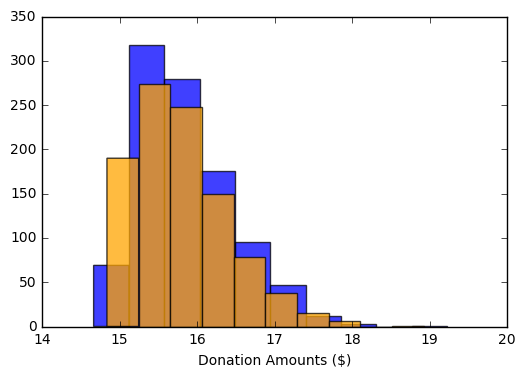

In [183]:
plt.hist(blue_skewed, alpha= 0.75)
plt.hist(orange_skewed, color= 'orange', alpha= 0.75)
plt.xlabel('Donation Amounts ($)')
print 'Histogram'

### Mann-Whitney/Wilcoxon-ranksum and KSTest

If NOT normally distributed, T-tests may still work, but you'll likely need very large datasets. 

A better option could be to use non-parametric tests that don't assume normality. For unpaired tests we can use the Wilcoxon/Mann-Whitney Test or a 2 sample Kilmogorov-Smirnov test (KS test).

In [178]:
#Let's first try the two-sample T-test we used before
print 'T-Test p-value: ' 
scipy.stats.ttest_ind(blue_skewed, orange_skewed, equal_var= True)

T-Test p-value: 


Ttest_indResult(statistic=1.8045086905313954, pvalue=0.071302122160127712)

In [180]:
#Now, the Mann-Whitney Test
print 'MW/RS Test p-value: '
stats.ranksums(blue_skewed, orange_skewed)

MW/RS Test p-value: 


RanksumsResult(statistic=1.9748827669075666, pvalue=0.048281453491185435)

In [179]:
#Finally let's try the 2 sample KS Test
print 'KS Test p-value: '
stats.ks_2samp(blue_skewed, orange_skewed)

KS Test p-value: 


Ks_2sampResult(statistic=0.056999999999999995, pvalue=0.074847083825206578)

This is an interesting result. As we mentioned earlier, the T-Test is no longer the appropriate test to use since our samples are not normally distributed. Here the test tells us that we failed to reject the null hypothesis since we're above p= 0.05. 

The correct test to use is the Mann-Whitney/Wilcoxon Ranksum test. It tells us that we actually fall below our significance threshold and we can thus reject our null hypothesis. 

Finally, another non-parametric test we can use is the KS Test. We see that like the T-Test, it also fails to reject the null hypothesis. Although it is non-parametric and doesn't assume normality, we can see that it failed to detect the difference that the MW test recognized (often cited as one of its weaknesses as a result of low statistical power).

## Categorical Data: Chi-Squared Test

<a id='Categorical Data: Chi-Squared Test'></a>


In this scenario, we're no longer looking at the means. Instead, we'll look at the proportions or frequencies that events occur to determine if there's a significant difference between the frequencies of two groups. 

As an example, let's calculate the frequency of purchases actually placed once a user has clicked on the orange or blue buttons.

            User enters portal --> User clicks purchase button (clicks) --> User makes purchase (purchases)
            
Let's see what some of this data could look like.                             

In [259]:
#Sample some random data from users
np.random.seed(123)

blueClicks= np.random.randint(100000)
orangeClicks= np.random.randint(100000)

#Get a fraction of these 
bluePurch= np.random.randint(blueClicks)
orangePurch= np.random.randint(orangeClicks)

print 'Blue clicks: ', blueClicks, 'Orange clicks: ', orangeClicks
print 'Blue purchases: ', bluePurch, 'Orange purchases: ', orangePurch

Blue clicks:  15725 Orange clicks:  28030
Blue purchases:  1346 Orange purchases:  21602


### Hypothesis Test: Chi-squared Test

Users who purchased items had to go through this pipeline and as you'd expect, <strong>totButton</strong> will typically be larger than <strong>totBuy</strong> because some people change their minds and decide at the last second that they do not want to purchase an item. Let's generate some data to test if the frequency of purchases from the orange button is significantly different than for the blue button!  

\begin{align}
\ x^2 = \sum_{i=1}^n\frac{(\text{Observed - Expected})^2}{\text{Expected}}\\
\end{align}

To get the observed and expected frequencies of purchases we'll do the following calculations: 

\begin{align}
\ obsBlueFreq= \frac{\text{bluePurch}}{\text{blueClicks}}\\
\end{align}

\begin{align}
\ obsOrangeFreq= \frac{\text{orangePurch}}{\text{orangeClicks}}\\
\end{align}

and the <strong><i>expected frequencies</i></strong> are just the mean of the two. Thus:

In [275]:
obsBlueFreq = bluePurch/blueClicks
obsOrangeFreq = orangePurch/orangeClicks
expectedFreq = np.mean([observedBlue,observedOrange])

And since we only have two options Chi-squared value is just:

\begin{align}
\ x^2 = \frac{(\text{obsBlueFreq - expectedFreq})^2}{\text{expectedFreq}} + \frac{(\text{obsOrangeFreq - expectedFreq})^2}{\text{expectedFreq}}\\
\end{align}

## Power Analysis

<a id='Power Analysis'></a>

Power analysis is a method in experimental design used to calculate the sample size needed to detect an effect at a certain confidence level. When comparing the <strong>difference of means</strong> for a control and an experimental group in an A/B test, we calculate the sample size as follows:

\begin{align}
\ n = \frac{2*sigma^2*(beta + alpha)^2}{effect^2} \\
\end{align}

Where n is the sample size, sigma is the standard deviation, alpha is the rate of type I errors, beta is rate of type II errors, and effect is the difference in means of the two groups you expect to see in your measurement.

n - The number of measurements you'd need to make to arrive at a statistically signficant difference designated by your critical value, alpha.

alpha - Threshold for detecting false positives. Arbitrary, though a surprisingly high p-value of 0.05 has been used historically.

beta - Threshold for <strong>not</strong> detecting a true event when it has occurred (false negative). Another arbitrary value of 0.8 has been used in the past.

Effect Size - The magnitude of the difference between means of two groups that one would expect to see for this experiment.

Sigma - Population standard deviation. If you don't know it for the population you can estimate it by sampling the population and using the sample standard deviation instead.

## Final Thoughts

<a id='Final Thoughts'></a>